# 1\. **Kernel Density Estimate**

Produce a KDE for a given distribution (by hand, not using seaborn!):

* Fill a numpy array, x,  of len(N) (with N=O(100)) with a variable normally distributed, with a given mean a standard deviation
* Fill an histogram in pyplot taking properly care about the aesthetic
   * use a meaningful number of bins
   * set a proper y axis label
   * set proper value of y axis major ticks labels (e.g. you want to display only integer labels)
   * display the histograms as data points with errors (the error being the poisson uncertainty)
* for every element of x, create a gaussian with the mean corresponding the element value and std as a parameter that can be tuned. The std default value should be:
$$ 1.06 * x.std() * x.size ^{-\frac{1}{5.}} $$
you can use the scipy function `stats.norm()` for that.
* In a separate plot (to be placed beside the original histogram), plot all the gaussian functions so obtained
* Sum (with np.sum()) all the gaussian functions and normalize the result such that the integral matches the integral of the original histogram. For that you could use the `scipy.integrate.trapz()` method


In [2]:
import numpy as np
array=np.random.normal(0,1,250)

[ 3.45539814  4.77000032  7.28423493 10.83218097 15.04545677 21.88938553
 33.31489473 47.46749786 61.48293657 75.07373894 86.79170652 92.05710216
 90.1713803  86.07011867 82.08771816 75.32613575 64.32146731 51.71671039
 39.86713982 29.20180505 20.17118618 13.39655649  8.6181092   5.18956418
  2.92973252]


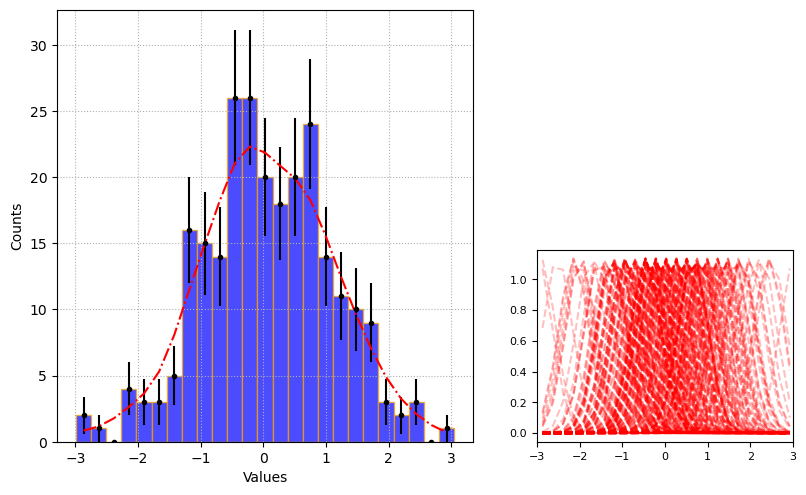

In [4]:
import matplotlib.pyplot as plt
from scipy.stats import norm
from scipy.integrate import trapz

fig=plt.figure()
ax=fig.add_axes([0,0,0.65,0.9])
#plt.subplot2grid((2,3),(0,0),colspan=2,rowspan=2)
bins=25
counts, edges, _ =ax.hist(array,bins,density=False, edgecolor='orange',color='blue',alpha=0.7)
ax.set_ylabel('Counts')
ax.set_xlabel('Values')
#plt.plot()
#plt.gca().set_axisbelow(True)
#ax.set_axisbelow(True)
ax.grid(linestyle=':')
errors=np.sqrt(counts)
distance=np.max(edges)-np.min(edges)
bin_centers=np.linspace(np.min(edges)+distance/(2*bins),np.max(edges)-distance/(2*bins),bins)
ax.errorbar(bin_centers, counts, yerr=errors, fmt='.', color='black')

g=np.zeros_like(bin_centers)
for i in array:
    gauss=norm(loc=i,scale=1.06*array.size**(-1./5.))
    g+=gauss.pdf(bin_centers)
print(g)
int_hist=trapz(counts,bin_centers)
int_g=trapz(g,bin_centers)
g=g/(int_g/int_hist)
ax.plot(bin_centers,g,c='r',linestyle='-.')

ax1=fig.add_axes([0.75,0,0.4,0.4])
ax1.set_xlim(-3,3)
ax1.tick_params(axis='both', labelsize=8)

in_g = np.zeros((len(array), len(bin_centers)))
for idx, value in enumerate(array):
    gauss = norm(loc=value, scale=1.06 * array.size**(-1./5.))
    in_g[idx] = gauss.pdf(bin_centers)
    ax1.plot(bin_centers, in_g[idx], alpha=0.25,c='r', linestyle='--')

2\. **Color-coded scatter plot**

Produce a scatter plot out of a dataset with two categories

* Write a function that generate a 2D datasets of 2 categories. Each category should distribute as a 2D gaussian with a given mean and std (clearly it is better to have different values means..)
* Display the dataset in a scatter plot marking the two categories with different marker colors.

An example is given below

You can try to make the procedure more general by allowing a given number $n\ge 2$ of categories

"wget" non è riconosciuto come comando interno o esterno,
 un programma eseguibile o un file batch.


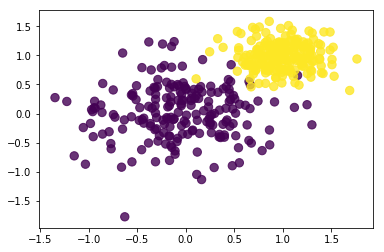

In [3]:
! wget https://www.dropbox.com/s/u4y3k4kk5tc7j46/two_categories_scatter_plot.png
from IPython.display import Image
Image('two_categories_scatter_plot.png')

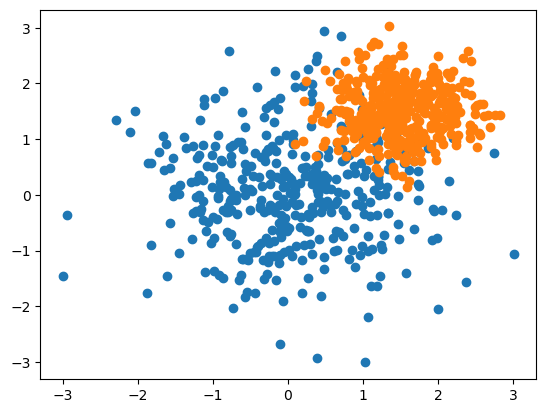

In [8]:
n=2
N=400
a=np.random.normal(loc=0,scale=1,size=(N,2))
b=np.random.normal(loc=1.5,scale=0.5,size=(N,2))
#print(a)
plt.scatter(a[:,0],a[:,1],marker='o')
plt.scatter(b[:,0],b[:,1],marker='o')


3\. **Profile plot**

Produce a profile plot from a scatter plot.
* Download the following dataset and load it as a pandas dataframe:
```bash
wget https://www.dropbox.com/s/hgnvyj9abatk8g6/residuals_261.npy
```
Note that you should use the `np.load()` function to load the file as a numpy array, call the `.item()` method, and then pass it to the `pd.DataFrame()` constructor.
* Inspect the dataset, you'll find two variables (features)
* Clean the sample by selecting the entries (rows) with the variable "residual" in absolute value smaller than 2
* perform a linear regression of "residuals" versus "distances" using `scipy.stats.linregress()` 
* plot a seaborn jointplot of  "residuals" versus "distances", having seaborn performing a linear regression. The result of the regression should be displayed on the plot
* Fill 3 numpy arrays
  * x, serving as an array of bin centers for the "distance" variable. It should range from 0 to 20 with reasonable number of steps (bins)
  * y, the mean values of the "residuals", estimated in slices (bins) of "distance"
  * erry, the standard deviation of the  of the "residuals", estimated in slices (bins) of "distance"
* Plot the profile plot on top of the scatter plot

In [5]:
!wget https://www.dropbox.com/s/hgnvyj9abatk8g6/residuals_261.npy

"wget" non è riconosciuto come comando interno o esterno,
 un programma eseguibile o un file batch.


In [6]:
import numpy as np 
import pandas as pd
import seaborn as sns
from scipy.stats import linregress

m=np.load('residuals_261.npy',allow_pickle=True).item()
df=pd.DataFrame(m)
df.head() 

,residuals,distances
0,1.10,16.0
1,-1.95,6.3
2,-7.20,3.4
3,-4.15,8.4
4,-6.59,1.7


LinregressResult(slope=0.0032597701220305835, intercept=-0.15432816763069473, rvalue=0.043403510522559086, pvalue=8.717037183576464e-06, stderr=0.0007327014008445789, intercept_stderr=0.008458951961471835)


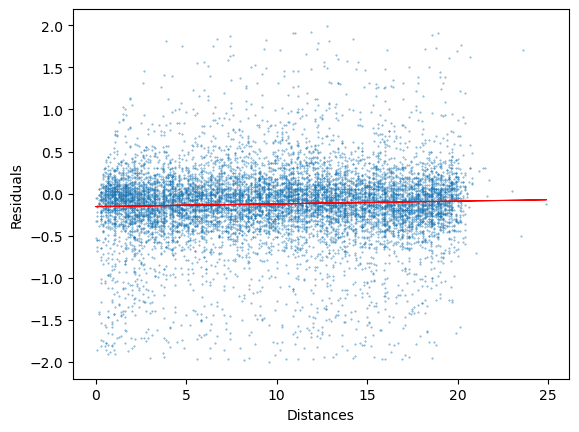

C:\Users\utente\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\utente\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


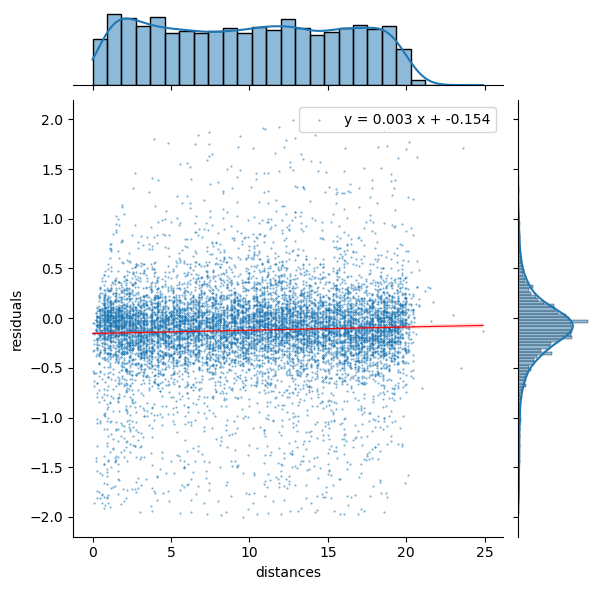

In [8]:
dfnew=df.loc[abs(df.residuals)<2].copy()
dfnew.head()
reg_result=linregress(dfnew['distances'],dfnew['residuals'])
print(reg_result)
plt.figure()
plt.plot('distances','residuals',data=dfnew,marker='.',alpha=0.7,linewidth=0,markersize=0.8)
plt.plot(dfnew['distances'],dfnew['distances']*reg_result.slope+reg_result.intercept,color='r',linewidth=0.8)
plt.xlabel('Distances')
plt.ylabel('Residuals')
plt.show()

g=sns.jointplot(y='residuals',x='distances', data=dfnew, kind='reg', marker='.',scatter_kws={'s': 0.8,'alpha':0.7},line_kws={'color': 'red','linewidth':0.8})

equation=f'y = {reg_result.slope:.3f} x + {reg_result.intercept:.3f}'
plt.legend([equation], loc='best')

plt.show()

C:\Users\utente\AppData\Local\Temp\ipykernel_11488\174831625.py:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = dfnew.groupby('distance_bins')['residuals']


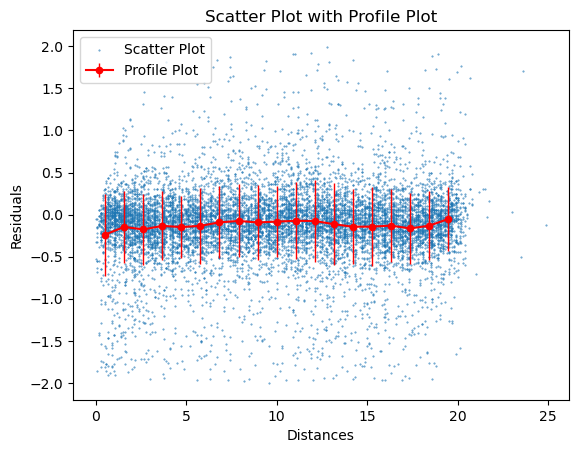

In [10]:
#Fill 3 numpy arrays
#x, serving as an array of bin centers for the "distance" variable. It should range from 0 to 20 with reasonable number of steps (bins)
#y, the mean values of the "residuals", estimated in slices (bins) of "distance"
#erry, the standard deviation of the of the "residuals", estimated in slices (bins) of "distance"
#Plot the profile plot on top of the scatter plot

bins = np.linspace(0, 20, 20)  
dfnew['distance_bins'] = pd.cut(dfnew['distances'], bins=bins)
grouped = dfnew.groupby('distance_bins')['residuals']
x = bins[:-1] + np.diff(bins) / 2  
y = grouped.mean()
erry = grouped.std()

plt.scatter(dfnew['distances'], dfnew['residuals'],marker='.', s=0.8, alpha=0.8, label='Scatter Plot')
plt.errorbar(x, y, yerr=erry, fmt='o-', color='red', label='Profile Plot',elinewidth=1,markersize=4.5,ecolor='red')

plt.xlabel('Distances')
plt.ylabel('Residuals')
plt.title('Scatter Plot with Profile Plot')
plt.legend(loc='best')
plt.show()

In [14]:
dfnew


,residuals,distances,distance_bins
0,1.100000,16.0,"(15.789, 16.842]"
1,-1.950000,6.3,"(5.263, 6.316]"
8,-0.042857,3.3,"(3.158, 4.211]"
9,0.128571,5.3,"(5.263, 6.316]"
10,0.085714,15.0,"(14.737, 15.789]"
...,...,...,...
11126,-0.760000,14.4,"(13.684, 14.737]"
11127,0.380000,7.5,"(7.368, 8.421]"
11128,0.083333,1.7,"(1.053, 2.105]"
11129,0.166667,19.1,"(18.947, 20.0]"
